# Ad-Hoc Reporting

Utilize your `sqlite3` and `pandas` knowledge to query your database and generate visualizations! 

After completing your report, answer the 4 analytical questions below. Remember that we expect comprehensive numerical detail! 

In [42]:
import sqlite3

import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
# TODO: Set up a connection the "Market.db" database
connection = sqlite3.connect("db/Market.db")

# TODO: Set up the cursor
cursor = connection.cursor()


In [45]:
cursor.execute("PRAGMA table_info(Products);")
columns = cursor.fetchall()
for col in columns:
    print(col)


(0, 'ProductID', 'INTEGER', 0, None, 1)
(1, 'ProductName', 'TEXT', 0, None, 0)
(2, 'SupplierID', 'INTEGER', 0, None, 0)
(3, 'CategoryID', 'INTEGER', 0, None, 0)
(4, 'Unit', 'TEXT', 0, None, 0)
(5, 'Price', 'NUMERIC', 0, '0', 0)


### Question 1 : Total Products Less than €10

How many products in our Products table cost less than 10 EUR?

**Hint**: You can apply an aggregate function to an entire table.

In [46]:
# TODO: Write a SQL query which will answer the question above.
# Total Products Less than €10
cursor.execute("""
    SELECT COUNT(*) FROM Products WHERE Price < 10;

""")

rows = cursor.fetchall()
print(rows)
print("Total products under €10:", rows[0][0])

[(11,)]
Total products under €10: 11


### Question 2 : Most Frequent Country by Supplier

What is the most common country of origin in our Suppliers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [47]:
# TODO: Write a SQL query which will answer the question above.
# Most Frequent Country by Supplier
cursor.execute("""
    SELECT Country, COUNT(*) AS SupplierCount
    FROM Suppliers
    GROUP BY Country
    ORDER BY SupplierCount DESC;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print("Most common supplier countries (descending):")
for row in rows:
    print(f"{row[0]} - {row[1]} suppliers")


Most common supplier countries (descending):
USA - 4 suppliers
Germany - 3 suppliers
France - 3 suppliers
UK - 2 suppliers
Sweden - 2 suppliers
Japan - 2 suppliers
Italy - 2 suppliers
Canada - 2 suppliers
Australia - 2 suppliers
Spain - 1 suppliers
Singapore - 1 suppliers
Norway - 1 suppliers
Netherlands - 1 suppliers
Finland - 1 suppliers
Denmark - 1 suppliers
Brazil - 1 suppliers


C:\Users\colet\AppData\Local\Temp\ipykernel_25276\1244073983.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="SupplierCount", y="Country", palette="magma")


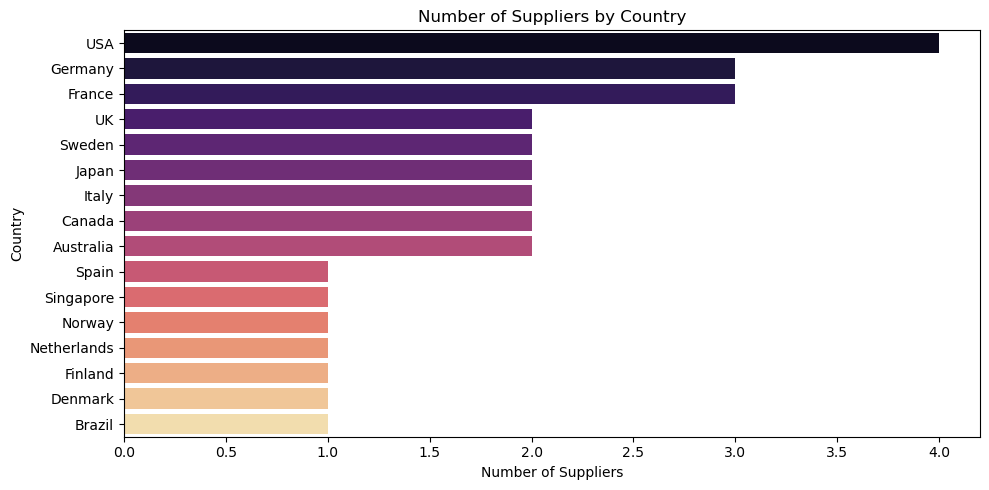

In [49]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['Country', 'SupplierCount'])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="SupplierCount", y="Country", palette="magma")
plt.title("Number of Suppliers by Country")
plt.xlabel("Number of Suppliers")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

### Question 3 : Most Frequent Country by Customer

What is the most common country of origin in our Customers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [50]:
# TODO: Write a SQL query which will answer the question above.
# Most Frequent Country by Customer
cursor.execute("""
    SELECT Country, COUNT(*) AS CustomerCount
    FROM Customers
    GROUP BY Country
    ORDER BY CustomerCount DESC;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print("Countries with the most customers (sorted):")
for row in rows:
    print(f"{row[0]} - {row[1]} customers")

Countries with the most customers (sorted):
USA - 13 customers
Germany - 11 customers
France - 11 customers
Brazil - 9 customers
UK - 7 customers
Spain - 5 customers
Mexico - 5 customers
Venezuela - 4 customers
Italy - 3 customers
Canada - 3 customers
Argentina - 3 customers
Switzerland - 2 customers
Sweden - 2 customers
Portugal - 2 customers
Finland - 2 customers
Denmark - 2 customers
Belgium - 2 customers
Austria - 2 customers
Poland - 1 customers
Norway - 1 customers
Ireland - 1 customers


C:\Users\colet\AppData\Local\Temp\ipykernel_25276\702521812.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="CustomerCount", y="Country", palette="crest")


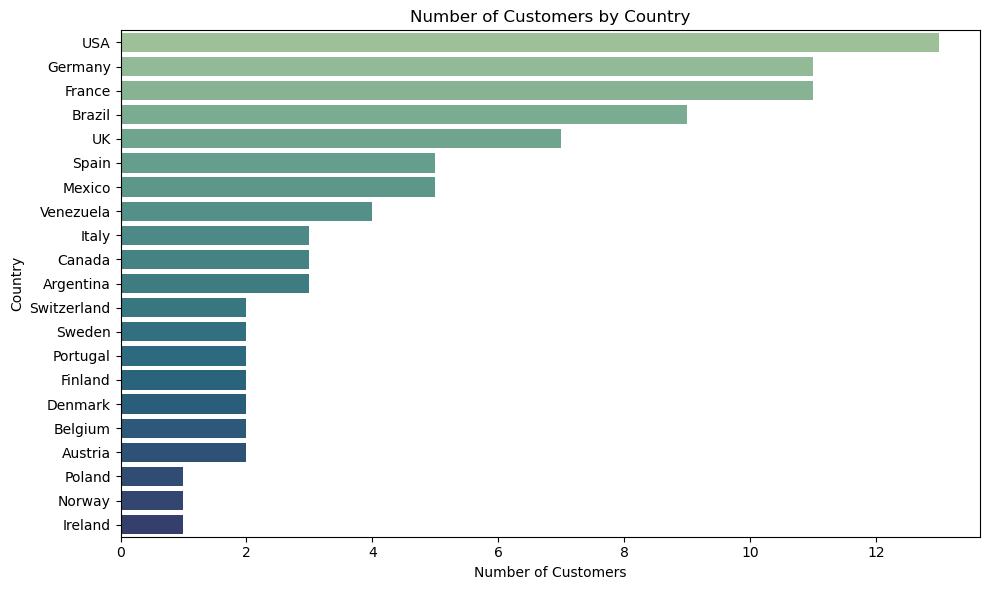

In [51]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['Country', 'CustomerCount'])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="CustomerCount", y="Country", palette="crest")
plt.title("Number of Customers by Country")
plt.xlabel("Number of Customers")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

### Question 4 : Least Popular Products by Quantity

What are the least popular products by order quantity? Limit your output to the bottom 20 products. Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [52]:
# TODO: Write a SQL query which will answer the question above.
# Least Popular Products by Quantity
cursor.execute("""
    SELECT p.ProductName, SUM(od.Quantity) AS TotalOrdered
    FROM OrderDetails od
    JOIN Products p ON od.ProductID = p.ProductID
    GROUP BY p.ProductName
    ORDER BY TotalOrdered ASC
    LIMIT 20;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()

print("20 Least Popular Products by Quantity Ordered:")
for row in rows:
    print(f"{row[0]} - {row[1]} units ordered")

20 Least Popular Products by Quantity Ordered:
Laughing Lumberjack Lager - 5 units ordered
Røgede sild - 15 units ordered
Gustaf's Knäckebröd - 18 units ordered
Mishi Kobe Niku - 20 units ordered
Genen Shouyu - 25 units ordered
Uncle Bob's Organic Dried Pears - 25 units ordered
Queso Manchego La Pastora - 27 units ordered
Grandma's Boysenberry Spread - 36 units ordered
Gravad lax - 39 units ordered
Röd Kaviar - 45 units ordered
Filo Mix - 48 units ordered
Mascarpone Fabioli - 52 units ordered
Chocolade - 70 units ordered
Valkoinen suklaa - 70 units ordered
NuNuCa Nuß-Nougat-Creme - 71 units ordered
Singaporean Hokkien Fried Mee - 77 units ordered
Aniseed Syrup - 80 units ordered
Ikura - 85 units ordered
Louisiana Hot Spiced Okra - 90 units ordered
Schoggi Schokolade - 90 units ordered


C:\Users\colet\AppData\Local\Temp\ipykernel_25276\1606893292.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="TotalOrdered", y="ProductName", palette="rocket")


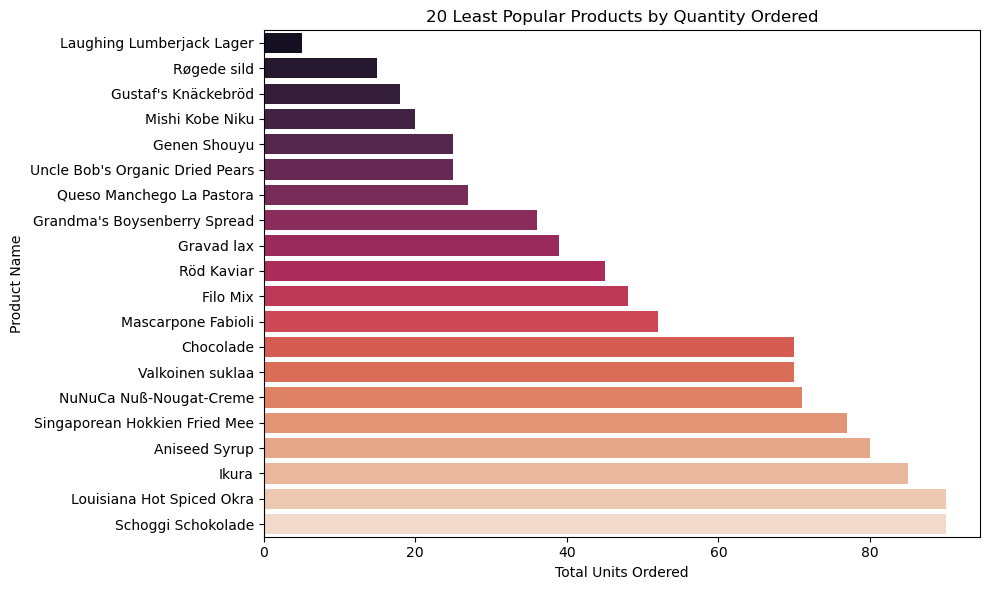

In [54]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['ProductName', 'TotalOrdered'])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="TotalOrdered", y="ProductName", palette="rocket")
plt.title("20 Least Popular Products by Quantity Ordered")
plt.xlabel("Total Units Ordered")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

### Question 5 : Least Popular Products by Revenue

What are the least popular products by **total revenue** (order quantity * price)? Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [55]:
# TODO: Write a SQL query which will answer the question above.
# Least Popular Products by Revenue
cursor.execute("""
    SELECT p.ProductName, SUM(od.Quantity * p.Price) AS TotalRevenue
    FROM OrderDetails od
    JOIN Products p ON od.ProductID = p.ProductID
    GROUP BY p.ProductName
    ORDER BY TotalRevenue ASC
    LIMIT 20;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()

print("20 Least Popular Products by Revenue:")
for row in rows:
    print(f"{row[0]} - €{row[1]:.2f} in revenue")


20 Least Popular Products by Revenue:
Laughing Lumberjack Lager - €70.00 in revenue
Røgede sild - €142.50 in revenue
Filo Mix - €336.00 in revenue
Gustaf's Knäckebröd - €378.00 in revenue
Genen Shouyu - €387.50 in revenue
Konbu - €552.00 in revenue
Röd Kaviar - €675.00 in revenue
Guaraná Fantástica - €711.00 in revenue
Uncle Bob's Organic Dried Pears - €750.00 in revenue
Geitost - €790.00 in revenue
Aniseed Syrup - €800.00 in revenue
Chocolade - €892.50 in revenue
Grandma's Boysenberry Spread - €900.00 in revenue
Zaanse koeken - €959.50 in revenue
NuNuCa Nuß-Nougat-Creme - €994.00 in revenue
Gravad lax - €1014.00 in revenue
Queso Manchego La Pastora - €1026.00 in revenue
Singaporean Hokkien Fried Mee - €1078.00 in revenue
Rhönbräu Klosterbier - €1116.00 in revenue
Valkoinen suklaa - €1137.50 in revenue


C:\Users\colet\AppData\Local\Temp\ipykernel_25276\2016696954.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="TotalRevenue", y="ProductName", palette="viridis")


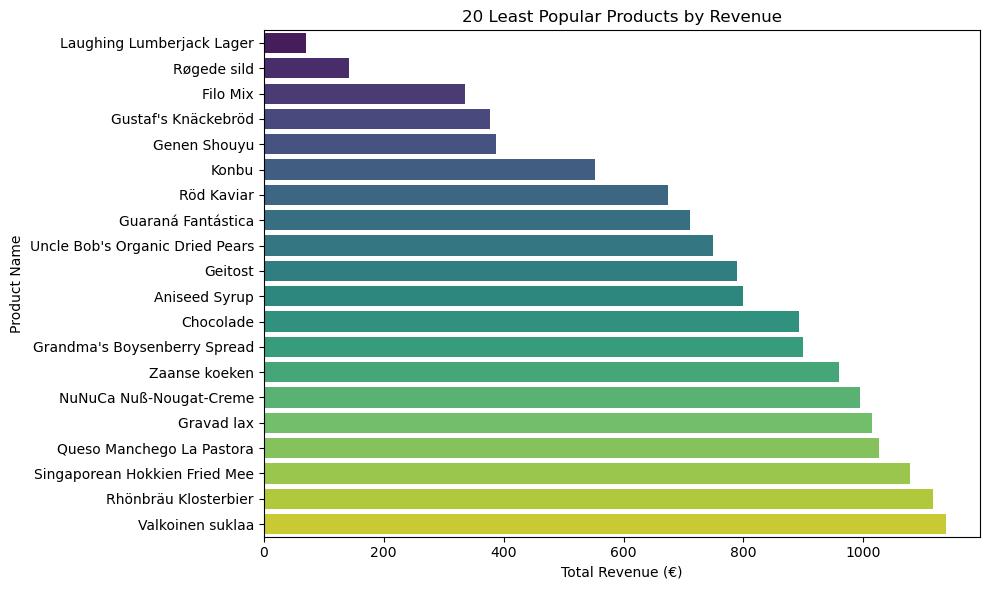

In [57]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['ProductName', 'TotalRevenue'])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="TotalRevenue", y="ProductName", palette="viridis")
plt.title("20 Least Popular Products by Revenue")
plt.xlabel("Total Revenue (€)")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()


### Question 6 : Countries with the Most Orders

Which country's have placed the most orders? For each country, list its' name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [58]:
# TODO: Write a SQL query which will answer the question above.
# Countries with the Most Orders
cursor.execute("""
    SELECT c.Country, COUNT(o.OrderID) AS TotalOrders
    FROM Orders o
    JOIN Customers c ON o.CustomerID = c.CustomerID
    GROUP BY c.Country
    ORDER BY TotalOrders DESC;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()

print("Countries with the Most Orders:")
for row in rows:
    print(f"{row[0]} - {row[1]} orders")


Countries with the Most Orders:
USA - 29 orders
Germany - 25 orders
Brazil - 19 orders
France - 18 orders
Austria - 13 orders
UK - 12 orders
Venezuela - 9 orders
Mexico - 9 orders
Canada - 9 orders
Finland - 8 orders
Sweden - 7 orders
Spain - 7 orders
Italy - 7 orders
Ireland - 6 orders
Portugal - 5 orders
Switzerland - 4 orders
Denmark - 4 orders
Belgium - 2 orders
Poland - 1 orders
Norway - 1 orders
Argentina - 1 orders


C:\Users\colet\AppData\Local\Temp\ipykernel_25276\496065129.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="TotalOrders", y="Country", palette="cividis")


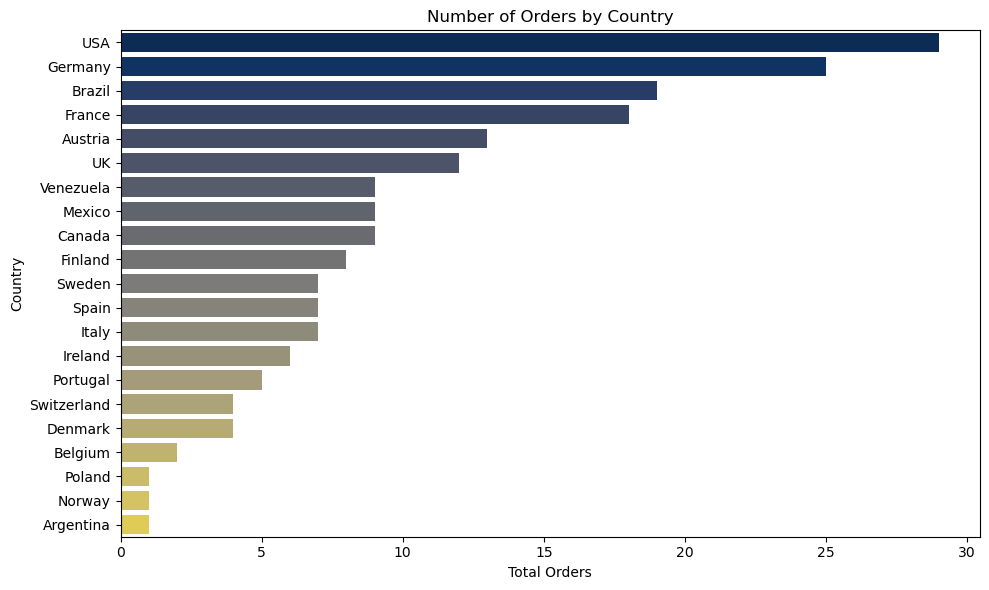

In [59]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=["Country", "TotalOrders"])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="TotalOrders", y="Country", palette="cividis")
plt.title("Number of Orders by Country")
plt.xlabel("Total Orders")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


### Question 7 : Countries with Customers Who Do Not Order

Which countries have at least one customer who has placed **no** orders? Count up the total number of customers who have placed no orders for each respective country. For each country, list its' name in your output and visualizations.

**Hint**: A join is necessary. We can also check if a column is `NULL` using the `IS` keyword.

In [60]:
# TODO: Write a SQL query which will answer the question above.
# Countries with Customers Who Do Not Order
cursor.execute("""
    SELECT c.Country, COUNT(c.CustomerID) AS NumNonOrderingCustomers
    FROM Customers c
    LEFT JOIN Orders o ON c.CustomerID = o.CustomerID
    WHERE o.OrderID IS NULL
    GROUP BY c.Country
    ORDER BY NumNonOrderingCustomers DESC;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()

print("Countries with Non-Ordering Customers:")
for row in rows:
    print(f"{row[0]} - {row[1]} customers with no orders")


Countries with Non-Ordering Customers:
USA - 5 customers with no orders
France - 4 customers with no orders
Germany - 2 customers with no orders
Argentina - 2 customers with no orders
UK - 1 customers with no orders
Spain - 1 customers with no orders
Canada - 1 customers with no orders
Belgium - 1 customers with no orders


C:\Users\colet\AppData\Local\Temp\ipykernel_25276\2266864607.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="NumNonOrderingCustomers", y="Country", palette="flare")


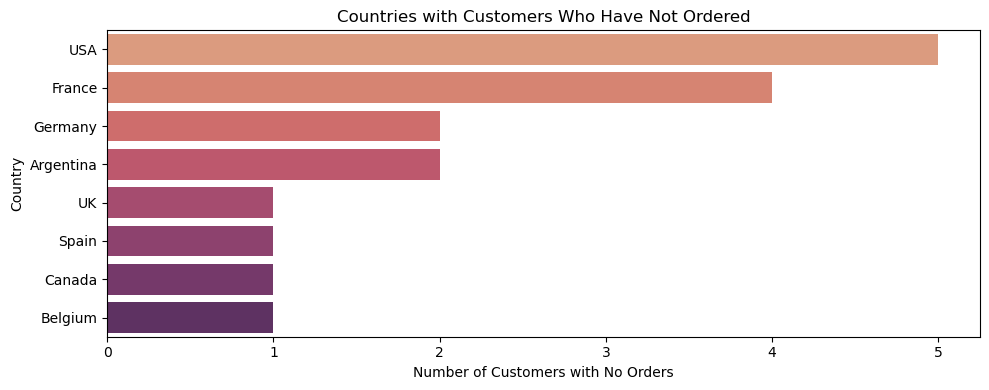

In [62]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=["Country", "NumNonOrderingCustomers"])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10,4))
sns.barplot(data=df, x="NumNonOrderingCustomers", y="Country", palette="flare")
plt.title("Countries with Customers Who Have Not Ordered")
plt.xlabel("Number of Customers with No Orders")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


### Question 8 : Most Popular Suppliers

What are the most popular suppliers according to order count? List the supplier names and their number of orders. Sort your output in descending order.

**Hint**: You might need to use a subquery to join more than 2 tables together.

In [63]:
# TODO: Write a SQL query which will answer the question above.
# Most Popular Suppliers by Order Count
cursor.execute("""
    SELECT s.SupplierName, COUNT(od.OrderID) AS OrderCount
    FROM OrderDetails od
    JOIN Products p ON od.ProductID = p.ProductID
    JOIN Suppliers s ON p.SupplierID = s.SupplierID
    GROUP BY s.SupplierName
    ORDER BY OrderCount DESC;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()

print("Most Popular Suppliers by Order Count:")
for row in rows:
    print(f"{row[0]} - {row[1]} orders")


Most Popular Suppliers by Order Count:
Plutzer Lebensmittelgroßmärkte AG - 42 orders
Pavlova, Ltd. - 40 orders
Specialty Biscuits, Ltd. - 33 orders
Norske Meierier - 32 orders
Formaggi Fortini s.r.l. - 31 orders
Gai pâturage - 26 orders
Exotic Liquid - 21 orders
Pasta Buttini s.r.l. - 20 orders
New Orleans Cajun Delights - 20 orders
Ma Maison - 19 orders
Karkki Oy - 19 orders
G'day, Mate - 19 orders
New England Seafood Cannery - 17 orders
Mayumi's - 17 orders
Leka Trading - 17 orders
Bigfoot Breweries - 16 orders
Heli Süßwaren GmbH & Co. KG - 15 orders
Forêts d'érables - 15 orders
Aux joyeux ecclésiastiques - 15 orders
Svensk Sjöföda AB - 14 orders
Tokyo Traders - 12 orders
Refrescos Americanas LTDA - 11 orders
Cooperativa de Quesos 'Las Cabras' - 11 orders
Nord-Ost-Fisch Handelsgesellschaft mbH - 8 orders
Lyngbysild - 8 orders
PB Knäckebröd AB - 6 orders
Grandma Kelly's Homestead - 6 orders
Zaanse Snoepfabriek - 4 orders
Escargots Nouveaux - 4 orders


C:\Users\colet\AppData\Local\Temp\ipykernel_25276\2974071840.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="OrderCount", y="SupplierName", palette="inferno")


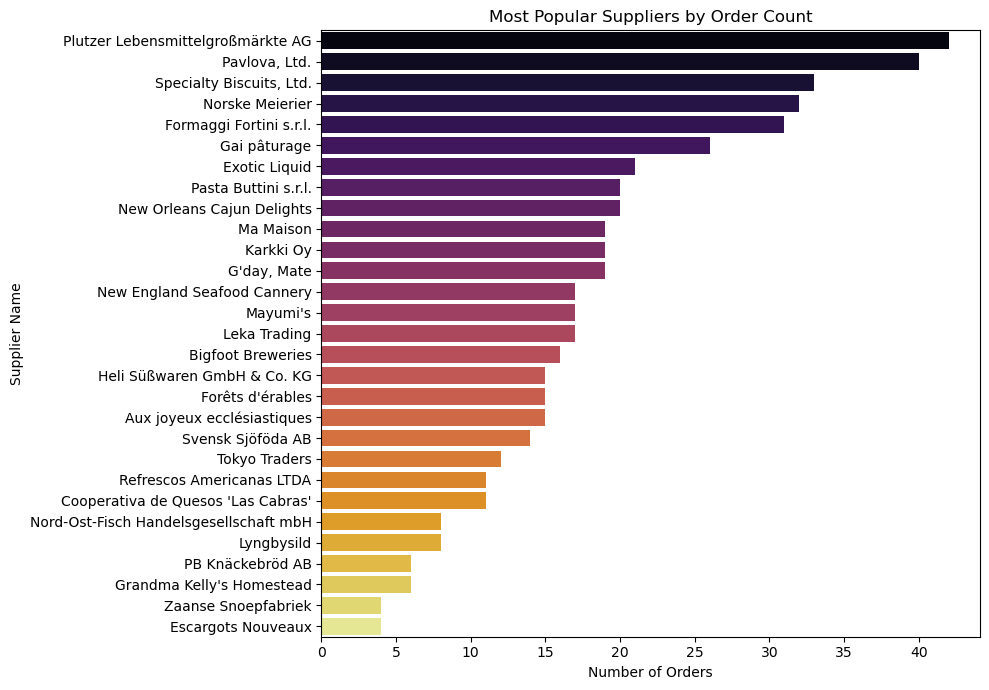

In [65]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=["SupplierName", "OrderCount"])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10,7))
sns.barplot(data=df, x="OrderCount", y="SupplierName", palette="inferno")
plt.title("Most Popular Suppliers by Order Count")
plt.xlabel("Number of Orders")
plt.ylabel("Supplier Name")
plt.tight_layout()
plt.show()


## Report

Answer the following analytical questions using numerical evidence.

### Question 1

Which countries have the greatest number of customers? How does this correlate with the number of suppliers by country (i.e. do more customers lead to less or more suppliers)? Which evidence supports your answer?

Answer: From the provided data, there appears to be a positive correlation between the number of customers and the number of suppliers in a country. USA has the greatest number of customers (13), followed by Germany and France (11 each). USA also has the highest number of suppliers (4), followed by Germany and France (3 each). This shows that countries with more customers tend to also have more suppliers.

### Question 2

What is the least popular product by order quantity? How does this correlate with revenue (i.e. do less popular products by quantity lead to less or more revenue)? Which evidence supports your answer?

Answer: Laughing Lumberjack Lager was the least popular product as it had the lowest quantity ordered, with just 5 units, and it also generated the least revenue at €70.00. Notably, 4 of the 5 least popular products by quantity also appear among the top 5 least revenue-generating products, reinforcing a strong correlation between low order volume and low revenue in this dataset.


### Question 3

Which country has the most orders? How does this correlate with the number of customers who do not order (i.e. do countries with more ordering customers have more or less non-ordering customers)? Which evidence supports your answer?

Answer: The USA placed the most orders (29), followed by Germany (25), Brazil (19), France (18), Austria (13), and the UK (12).
However, the countries with the highest number of non-ordering customers include: USA (5), France (4), Germany (2), Argentina (2), and UK (1).
This suggests that even in countries with high order volumes, such as the USA and France, there are still notable numbers of customers who haven’t placed any orders. Therefore, a higher number of orders does not necessarily correlate with fewer non-ordering customers. In fact, it may reflect a larger overall customer base, including both active and inactive users.

### Question 4

Which supplier has the most orders? Which evidence supports your answer?

[Answer Here]